In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

Tensorflow Version 2.9.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adamz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [5]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

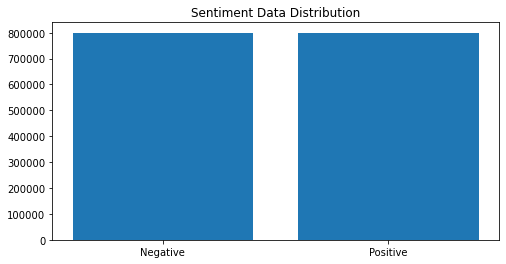

In [6]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [7]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
1271166,Positive,"@braz But I'm flexible, of course."
1552572,Positive,@manonfire Get 100 followers a day using www.t...
90816,Negative,Bleh. Testing tomorrow and i got a damn heada...
710924,Negative,"I know, I know..."
999292,Positive,On my way to the Creation Museum.
406958,Negative,@WereWolf_Embry i dont want you to leave Uncle...
958097,Positive,@artjohnson Thanx a lot Art! Appreciated that ...
551566,Negative,@CiscaBean I think 11 a lil too late. Froyo t...
181730,Negative,"@vulturgryphus Nice, thx! Now, let's see if th..."
1074900,Positive,@dannygokey Hopefully no one takes a picture ...


In [8]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [9]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [10]:
df.text = df.text.apply(lambda x: preprocess(x))

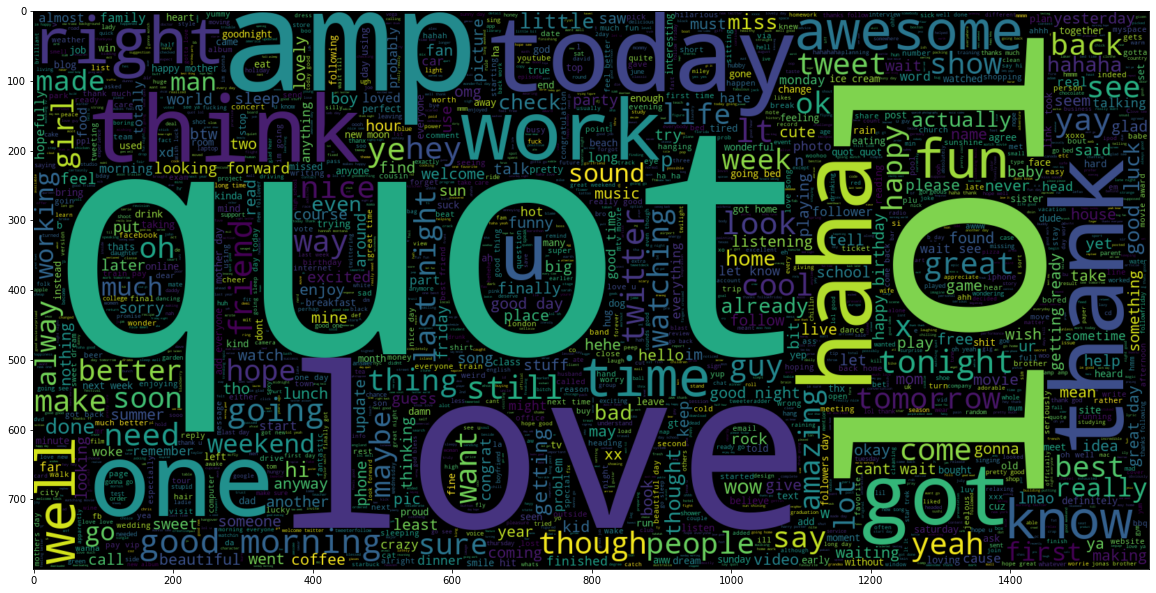

In [11]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

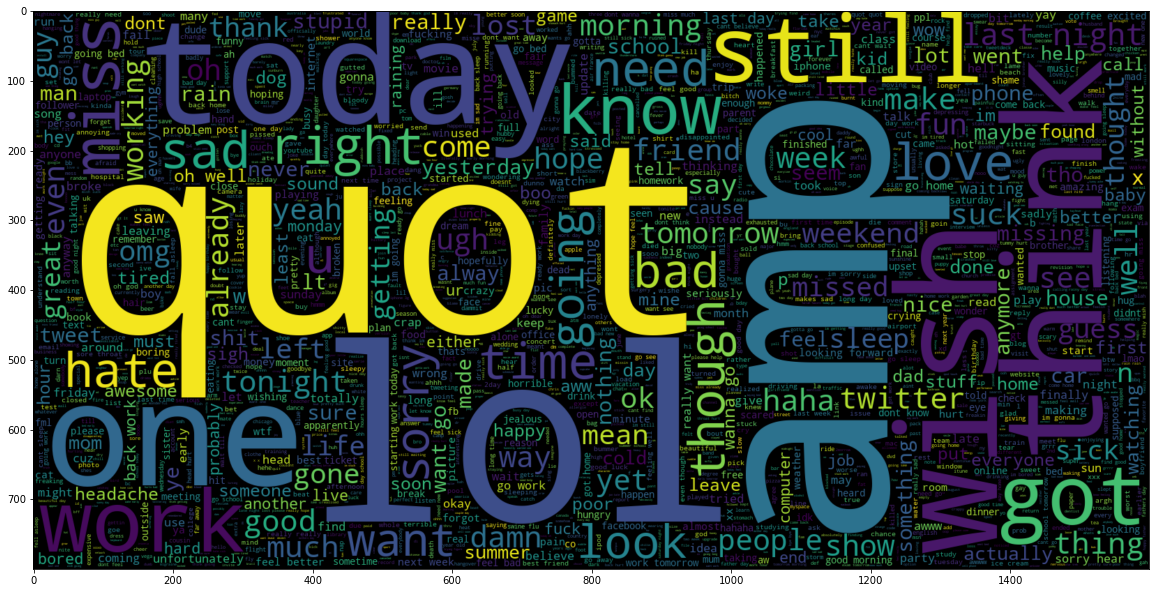

In [12]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [13]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [14]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [15]:
train_data.head(10)

,sentiment,text
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...
130866,Negative,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,sounds like cup tea sign
717314,Negative,tired want sleep wtf
969880,Positive,amazing wish
748698,Negative,thank god wkrn abc affiliate nashville back mi...


In [16]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


In [17]:
from keras.utils import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [18]:
x_train

array([[   0,    0,    0, ...,    0,   34,  110],
       [   0,    0,    0, ...,  133,  220, 2319],
       [   0,    0,    0, ..., 5649, 9960, 1060],
       ...,
       [   0,    0,    0, ...,  118, 1157,  687],
       [   0,    0,    0, ...,    1,  247,  107],
       [   0,    0,    0, ...,  665, 1308, 1868]])

In [19]:
labels = train_data.sentiment.unique().tolist()

In [20]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [ ]:
import wget, unzip

wget.download('http://nlp.stanford.edu/data/glove.6B.zip')
#!unzip glove.6B.zip

In [21]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [22]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

UnicodeDecodeError: 'charmap' codec can't decode byte 0x98 in position 8015: character maps to <undefined>

In [23]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [24]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [25]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [26]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [28]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


In [29]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 216s 160ms/step - loss: 0.5871 - accuracy: 0.6788 - val_loss: 0.5662 - val_accuracy: 0.6975 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 208s 167ms/step - loss: 0.5685 - accuracy: 0.6958 - val_loss: 0.5606 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 180s 144ms/step - loss: 0.5620 - accuracy: 0.7012 - val_loss: 0.5582 - val_accuracy: 0.7043 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 175s 140ms/step - loss: 0.5577 - accuracy: 0.7049 - val_loss: 0.5566 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 175s 140ms/step - loss: 0.5550 - accuracy: 0.7065 - val_loss: 0.5538 - val_accuracy: 0.7068 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 177s 142ms/step - loss: 0.5526 - accuracy: 0.7081 - val_loss: 0.5533 - val_accuracy: 0.7076 - lr: 0.0010
Epoch 7/10
1250/1250 [============

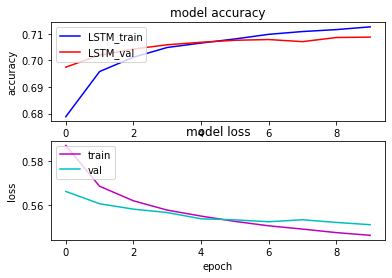

In [30]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [31]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 3s 59ms/step


In [32]:
model.save('sentiment140')

!python -m tf2onnx.convert --saved-model sentiment140 --output model_sentiment140.onnx --tag serve 

INFO:tensorflow:Assets written to: sentiment140\assets


INFO:tensorflow:Assets written to: sentiment140\assets


In [34]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 318s 32ms/step - loss: 0.5511 - accuracy: 0.7087


[0.5511124730110168, 0.7087374925613403]

In [36]:
import onnx

onnx_model = onnx.load("model_sentiment140.onnx")
onnx.checker.check_model(onnx_model)

In [37]:
import onnxruntime as ort
import numpy as np

ort_session = ort.InferenceSession("model_sentiment140.onnx")
ort_inputs = {ort_session.get_inputs()[0].name: np.array(x_test)}

In [38]:
import time

s=time.time()
model.predict(x_test)
e=time.time()
t1=e-s

s=time.time()
pred2 = ort_session.run(None, ort_inputs)
e=time.time()
t2=e-s

print("Czas predykcji modelu: ", t1)
print("Czas predykcji onnx: ", t2)
print("Stosunek czasu predykcji modelu względem onnx: ", t1/t2)

10000/10000 [==============================] - 248s 25ms/step
Czas predykcji modelu:  249.58270859718323
Czas predykcji onnx:  86.83131384849548
Stosunek czasu predykcji modelu względem onnx:  2.874339884257178


In [39]:
x=x_test[0]
x=np.array([x])
ort_inputs = {ort_session.get_inputs()[0].name: np.array(x)}

In [40]:
import time

s=time.time()
model.predict(x)
e=time.time()
t1=e-s

s=time.time()
pred2 = ort_session.run(None, ort_inputs)
e=time.time()
t2=e-s

print("Czas predykcji modelu: ", t1)
print("Czas predykcji onnx: ", t2)
print("Stosunek czasu predykcji modelu względem onnx: ", t1/t2)

1/1 [==============================] - 0s 479ms/step
Czas predykcji modelu:  0.9417319297790527
Czas predykcji onnx:  0.02700018882751465
Stosunek czasu predykcji modelu względem onnx:  34.878716433989425
